### Module 4: Exercise 01 -- Visualizing data with Python
#### Branton Dawson
#### 2/4/2026

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [2]:
import os
from urllib.parse import quote

os.environ['DB_USER'] = 'postgres'
os.environ['DB_PASSWORD'] = 'L0zborno)'
os.environ['DB_HOST'] = 'localhost'
os.environ['DB_PORT'] = '5432'
os.environ['DB_NAME'] = 'world'

# URL-encode the password to handle special characters
encoded_password = quote(os.getenv('DB_PASSWORD'), safe='')

# Define your connection string
engine = create_engine(
    f"postgresql://{os.getenv('DB_USER')}:{encoded_password}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
)

# Test the connection
with engine.connect() as connection:
    print("Connected successfully!")

Connected successfully!


In [8]:
# Query to find countries with more than 2 official languages

Postsql_query = """
SELECT country.name AS "Country", count(countrylanguage.language) AS "Number of Languages"
FROM country
JOIN countrylanguage
ON country.code = countrylanguage.countrycode
WHERE countrylanguage.isofficial = 'T'
GROUP BY country.name
HAVING COUNT(countrylanguage.isofficial) > 2
ORDER BY count(countrylanguage.language) DESC;
"""
df = pd.read_sql(Postsql_query, engine)
df

,Country,Number of Languages
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


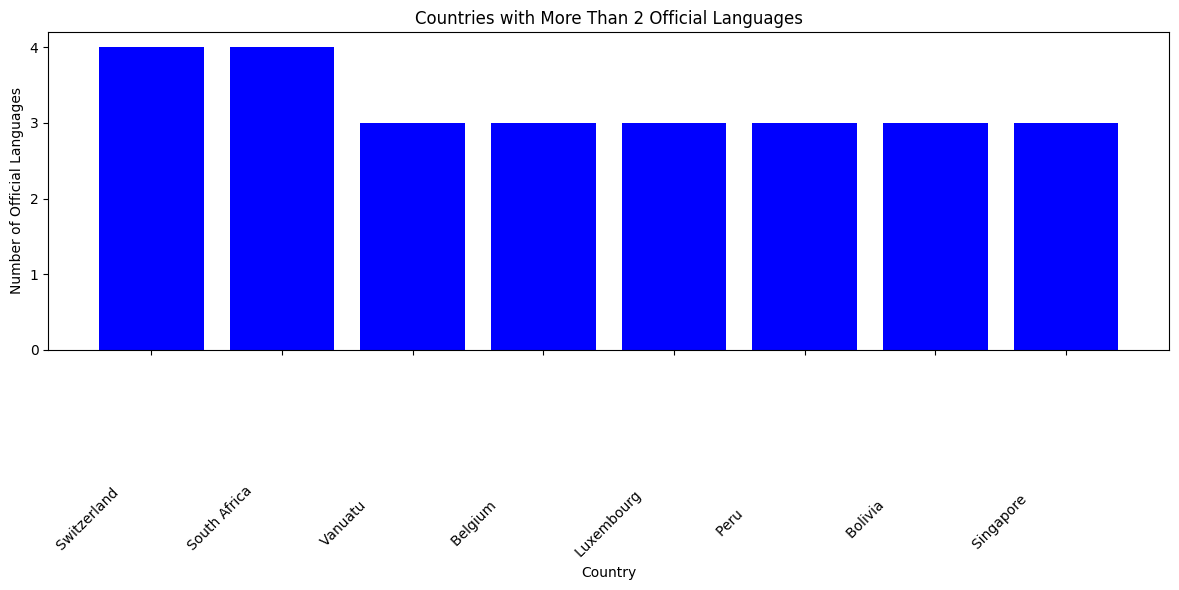

In [5]:
# Plot the results
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df['Country'], df['Number of Languages'], color='blue')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Country')
ax.set_ylabel('Number of Official Languages')
ax.set_title('Countries with More Than 2 Official Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()